In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras 

In [3]:
dataset=keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'C:\\Users\\personal\\.keras\\datasets\\auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
fueldata=pd.read_csv(dataset,names=column_names,na_values="?",comment='\t',
                      sep=" ", skipinitialspace=True)
fueldata.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
fueldata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [6]:
fueldata.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
def imp():
    imputer=SimpleImputer(strategy='mean')
    imputer.fit(fueldata)
    x=imputer.transform(fueldata)
    updated_data=pd.DataFrame(x,columns=fueldata.columns)
    return updated_data

In [9]:
fueldata2=imp()

In [10]:
fueldata2.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
fueldata.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
Model Year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


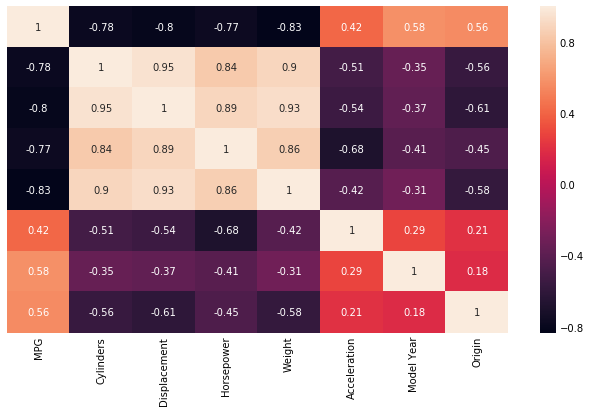

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(fueldata2.corr(),yticklabels=False,cbar=True,annot=True)

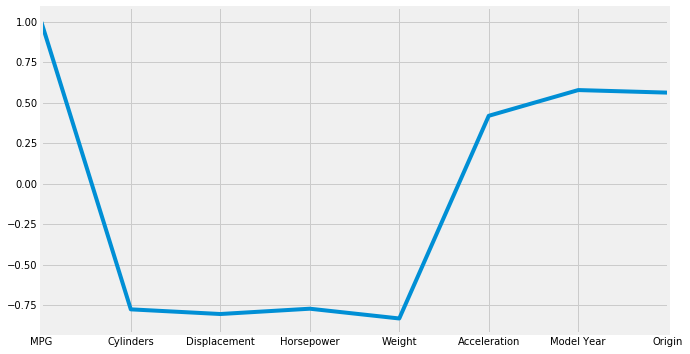

In [13]:
plt.figure(figsize=(10,6))
corrdata=pd.DataFrame(fueldata2.corr())
corrdata["MPG"].plot()

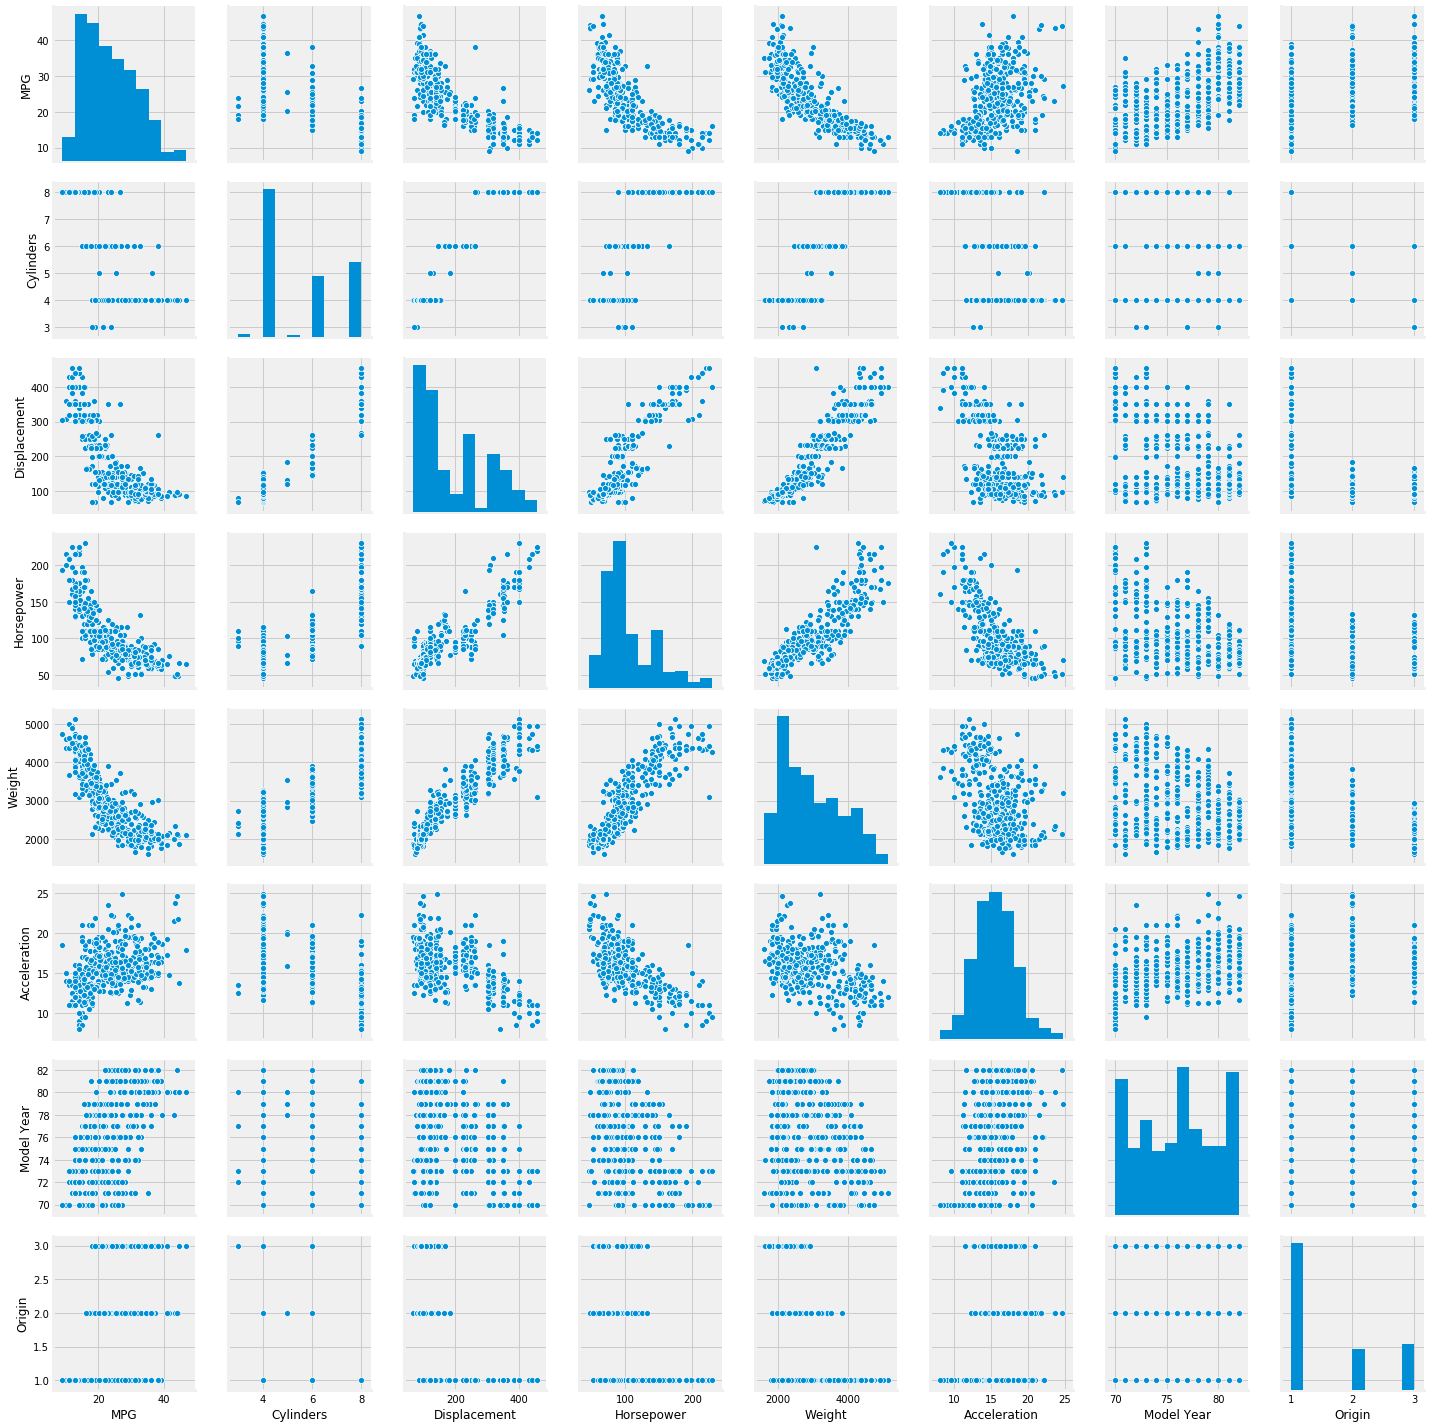

In [14]:
sns.pairplot(fueldata)

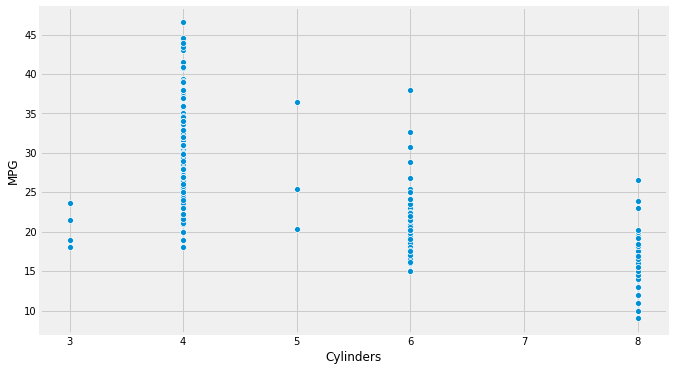

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Cylinders",y="MPG",data=fueldata2)

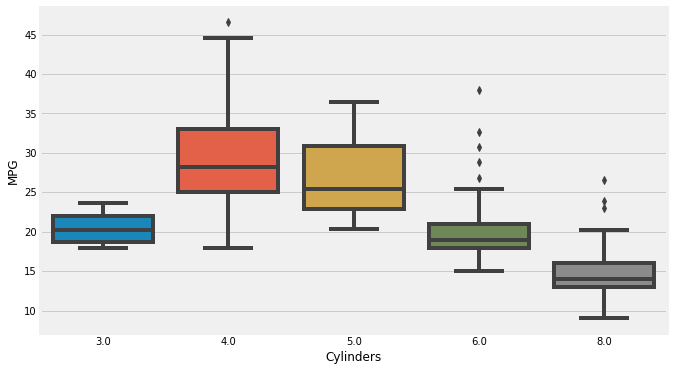

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Cylinders",y="MPG",data=fueldata2)

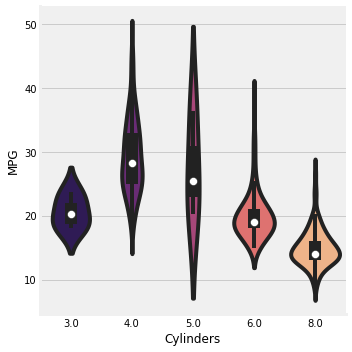

In [17]:
sns.catplot(x="Cylinders",y="MPG",data=fueldata2,kind="violin",palette="magma")

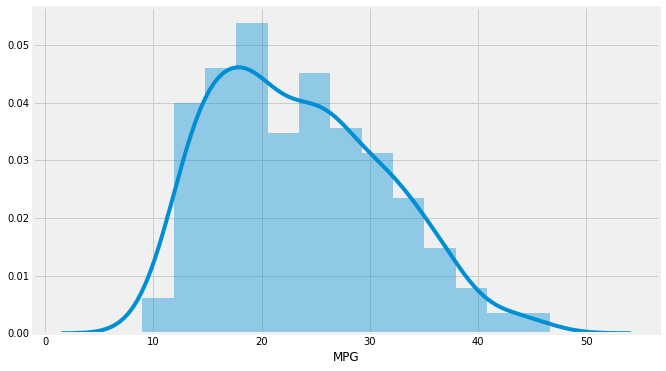

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(fueldata2["MPG"])

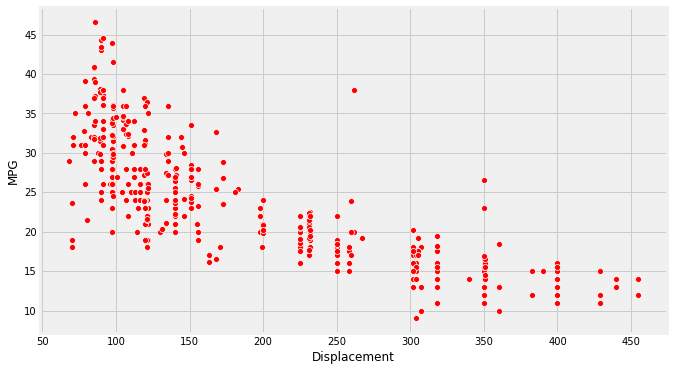

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Displacement",y="MPG",data=fueldata2,color="r")

<Figure size 720x432 with 0 Axes>

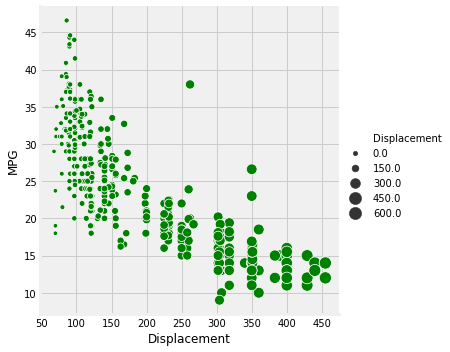

In [20]:
plt.figure(figsize=(10,6))
sns.relplot(x="Displacement",y="MPG",data=fueldata2,size="Displacement",sizes=(20,150),color="g")

<Figure size 720x432 with 0 Axes>

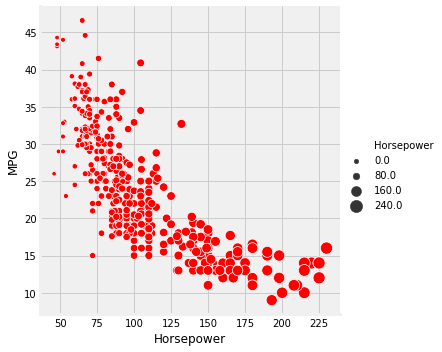

In [21]:
plt.figure(figsize=(10,6))
sns.relplot(x="Horsepower",y="MPG",data=fueldata2,size="Horsepower",sizes=(20,150),color="r")

<Figure size 720x432 with 0 Axes>

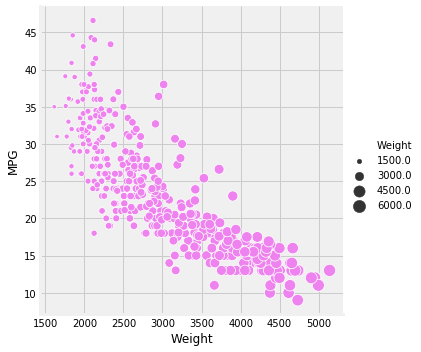

In [22]:
plt.figure(figsize=(10,6))
sns.relplot(x="Weight",y="MPG",data=fueldata2,size="Weight",sizes=(20,150),color="violet")

In [23]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.preprocessing import StandardScaler

In [24]:
x=fueldata2.drop("MPG",axis=1).values
y=fueldata2["MPG"].values

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20)

In [26]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
x_train.shape

(298, 7)

In [27]:
def modelcreating(optimizer="adam",loss="mse"):
    model=Sequential()
    model.add(Dense(25,input_dim=7,activation="relu"))
    model.add(Dense(20,activation="relu"))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(3,activation="relu"))
    model.add(Dense(1))
    model.compile(loss=loss,optimizer=optimizer)
    return model

In [28]:
model=modelcreating()
earlystopping=EarlyStopping(monitor="val_loss",mode="min",patience=50,verbose=1)

In [29]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),
          epochs=4000,batch_size=20,
          verbose=1,callbacks=[earlystopping])

Train on 298 samples, validate on 100 samples
Epoch 1/4000
298/298 [==============================] - 0s 820us/sample - loss: 590.2605 - val_loss: 722.1457
Epoch 2/4000
298/298 [==============================] - 0s 70us/sample - loss: 582.2874 - val_loss: 716.9141
Epoch 3/4000
298/298 [==============================] - 0s 67us/sample - loss: 578.6255 - val_loss: 714.3182
Epoch 4/4000
298/298 [==============================] - 0s 70us/sample - loss: 576.5695 - val_loss: 712.6242
Epoch 5/4000
298/298 [==============================] - 0s 77us/sample - loss: 574.7157 - val_loss: 710.2837
Epoch 6/4000
298/298 [==============================] - 0s 80us/sample - loss: 572.2259 - val_loss: 706.9998
Epoch 7/4000
298/298 [==============================] - 0s 74us/sample - loss: 568.9050 - val_loss: 702.6605
Epoch 8/4000
298/298 [==============================] - 0s 77us/sample - loss: 562.9869 - val_loss: 692.8035
Epoch 9/4000
298/298 [==============================] - 0s 77us/sample - loss: 55

298/298 [==============================] - 0s 60us/sample - loss: 7.3296 - val_loss: 14.1234
Epoch 77/4000
298/298 [==============================] - 0s 64us/sample - loss: 7.3315 - val_loss: 14.0941
Epoch 78/4000
298/298 [==============================] - 0s 64us/sample - loss: 7.3481 - val_loss: 13.9034
Epoch 79/4000
298/298 [==============================] - 0s 60us/sample - loss: 7.1725 - val_loss: 13.9070
Epoch 80/4000
298/298 [==============================] - 0s 64us/sample - loss: 7.1021 - val_loss: 13.5612
Epoch 81/4000
298/298 [==============================] - 0s 74us/sample - loss: 7.1590 - val_loss: 13.8264
Epoch 82/4000
298/298 [==============================] - 0s 60us/sample - loss: 7.0387 - val_loss: 13.7115
Epoch 83/4000
298/298 [==============================] - 0s 64us/sample - loss: 7.0099 - val_loss: 13.8196
Epoch 84/4000
298/298 [==============================] - 0s 67us/sample - loss: 6.9176 - val_loss: 13.6595
Epoch 85/4000
298/298 [============================

298/298 [==============================] - 0s 67us/sample - loss: 5.1341 - val_loss: 12.5161
Epoch 153/4000
298/298 [==============================] - 0s 67us/sample - loss: 5.2001 - val_loss: 12.5863
Epoch 154/4000
298/298 [==============================] - 0s 63us/sample - loss: 5.1611 - val_loss: 12.3638
Epoch 155/4000
298/298 [==============================] - 0s 60us/sample - loss: 5.2060 - val_loss: 12.4719
Epoch 156/4000
298/298 [==============================] - 0s 63us/sample - loss: 5.1169 - val_loss: 12.4462
Epoch 157/4000
298/298 [==============================] - 0s 67us/sample - loss: 5.0378 - val_loss: 12.4150
Epoch 158/4000
298/298 [==============================] - 0s 67us/sample - loss: 4.9983 - val_loss: 12.4635
Epoch 159/4000
298/298 [==============================] - 0s 67us/sample - loss: 5.0533 - val_loss: 12.2100
Epoch 160/4000
298/298 [==============================] - 0s 64us/sample - loss: 4.9885 - val_loss: 12.3785
Epoch 161/4000
298/298 [===================

Epoch 228/4000
298/298 [==============================] - 0s 64us/sample - loss: 4.3464 - val_loss: 11.6282
Epoch 229/4000
298/298 [==============================] - 0s 67us/sample - loss: 4.3189 - val_loss: 11.6105
Epoch 230/4000
298/298 [==============================] - 0s 67us/sample - loss: 4.3177 - val_loss: 11.4526
Epoch 231/4000
298/298 [==============================] - 0s 64us/sample - loss: 4.3698 - val_loss: 11.7532
Epoch 232/4000
298/298 [==============================] - 0s 64us/sample - loss: 4.4347 - val_loss: 11.7252
Epoch 233/4000
298/298 [==============================] - 0s 60us/sample - loss: 4.3012 - val_loss: 11.4254
Epoch 234/4000
298/298 [==============================] - 0s 67us/sample - loss: 4.2707 - val_loss: 11.5638
Epoch 235/4000
298/298 [==============================] - 0s 60us/sample - loss: 4.2633 - val_loss: 11.4942
Epoch 236/4000
298/298 [==============================] - 0s 60us/sample - loss: 4.2994 - val_loss: 11.5830
Epoch 237/4000
298/298 [====

298/298 [==============================] - 0s 60us/sample - loss: 3.8856 - val_loss: 11.3081
Epoch 304/4000
298/298 [==============================] - 0s 64us/sample - loss: 3.8868 - val_loss: 11.2167
Epoch 305/4000
298/298 [==============================] - 0s 64us/sample - loss: 3.8695 - val_loss: 11.1038
Epoch 306/4000
298/298 [==============================] - 0s 67us/sample - loss: 3.8427 - val_loss: 11.0947
Epoch 307/4000
298/298 [==============================] - 0s 64us/sample - loss: 3.9020 - val_loss: 11.2311
Epoch 308/4000
298/298 [==============================] - 0s 64us/sample - loss: 4.0479 - val_loss: 11.6518
Epoch 309/4000
298/298 [==============================] - 0s 60us/sample - loss: 3.9685 - val_loss: 10.9608
Epoch 310/4000
298/298 [==============================] - 0s 64us/sample - loss: 3.8621 - val_loss: 11.0441
Epoch 311/4000
298/298 [==============================] - 0s 67us/sample - loss: 3.8437 - val_loss: 11.2344
Epoch 312/4000
298/298 [===================

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 919
Trainable params: 919
Non-trainable params: 0
_________________________________________________________________


In [31]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,590.260457,722.145728
1,582.287436,716.914062
2,578.625497,714.318164
3,576.569451,712.624207
4,574.715694,710.283716


<Figure size 720x432 with 0 Axes>

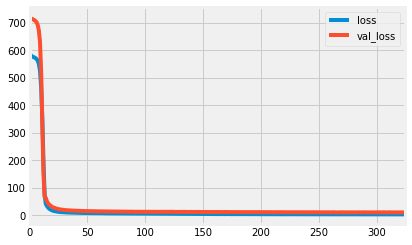

In [32]:
plt.figure(figsize=(10,6))
loss.plot()

In [33]:
y_pred=model.predict(x_test)

In [34]:
error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                     np.sqrt(mean_squared_error(y_test,y_pred)),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error","mean_squared_root_error",
                                 "mean_absolute_error","explained_variance_score"])
error

,mean_squared_error,mean_squared_root_error,mean_absolute_error,explained_variance_score
0,11.150166,3.339186,2.205214,0.85045


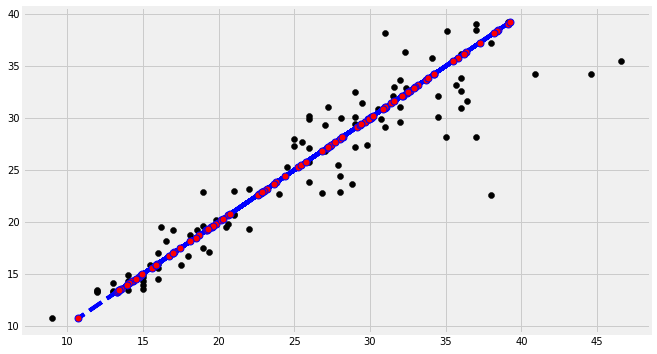

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color="black")
plt.plot(y_pred,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=7,linestyle='dashed')
plt.show()